In [1]:
import pandas as pd
import os
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib notebook

import seaborn as sns; 
sns.set(color_codes=True)
plt.style.use("seaborn-dark-palette")
sns.set_style("dark")

In [2]:
def plot_df(df, plot_path, plot_title, y_label="ZeroOneRankLoss",x_label="Number of Test Objects"):
    #plt.gcf().clear()
    fig, ax = plt.subplots()
    for col in df.columns.values[1:]:
        plt.plot(df[df.columns.values[0]], df[col], marker="o",label=col)
    ax.xaxis.set_ticks(np.arange(3, 25))
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    plt.title(plot_title)
    plt.legend(loc="best");
    plt.savefig(plot_path, facecolor='w', edgecolor='w',transparent=False, dpi=1200,format='pdf')
    plt.show()

In [3]:
def plot_df_pointplot(df, plot_path, plot_title, y_label="ZeroOneRankLoss",x_label="Number of Test Objects"):
    fig, ax = plt.subplots()
    for model,c in zip(df.columns.values[1:],['b', 'g', 'r', 'c']):
        ax = sns.pointplot(x=df.columns.values[0], y=model, data=df, ax=ax, color=c,label=model)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    handles, labels = ax.get_legend_handles_labels()
    plt.legend(loc="best")
    plt.savefig(plot_path, facecolor='w', edgecolor='w',transparent=False, dpi=1200,format='pdf')
    plt.show()

In [2]:
SUB_FOLDER = "gr_vis"
LOG_FOLDER = "logs"
df_result_path = os.path.join(os.getcwd(), SUB_FOLDER, "generalizing_mean_t_*.csv")
df_result_files = glob.glob(df_result_path)
objects = "Objects"
df_result_files

['/home/prithag/git/pref_learning_neural_network/notebooks/gr_vis/generalizing_mean_t_7.csv',
 '/home/prithag/git/pref_learning_neural_network/notebooks/gr_vis/generalizing_mean_t_6.csv',
 '/home/prithag/git/pref_learning_neural_network/notebooks/gr_vis/generalizing_mean_t_5.csv']

for i, file in enumerate(df_files):
    df_path = os.path.join(os.getcwd(), SUB_FOLDER ,"generalizing_mean_t_{}.csv".format(i+5))
    df_result_files.append(df_path)
    df = pd.read_csv(file, index_col=0)
    cols_new = [int(name.split(" ")[1]) for name in df.columns.values[1:]]
    df = df.set_index('aModel').T
    df[objects] = cols_new
    df.sort([objects], ascending=[1], inplace=True)
    df.set_index(objects,inplace=True)
    df.to_csv(df_path)
    df = pd.read_csv(df_path)
print(df_result_files)

<IPython.core.display.Javascript object>


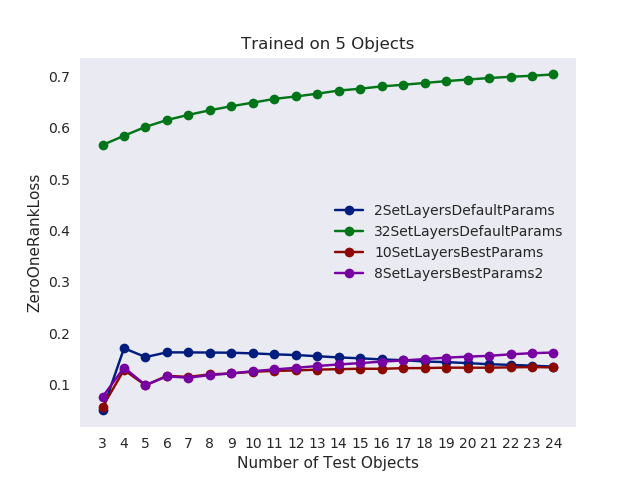

<IPython.core.display.Javascript object>


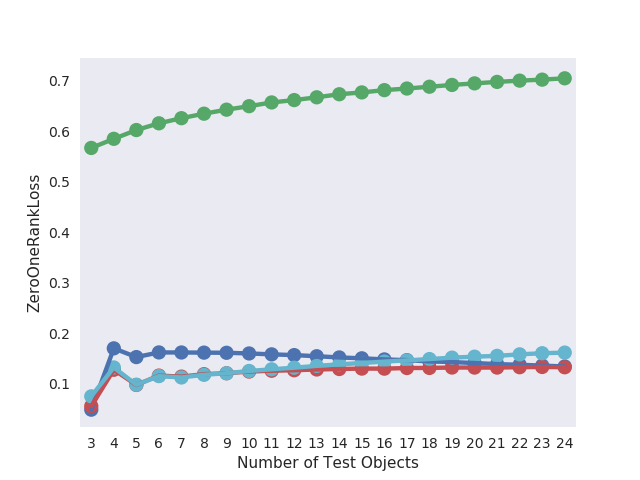

<IPython.core.display.Javascript object>


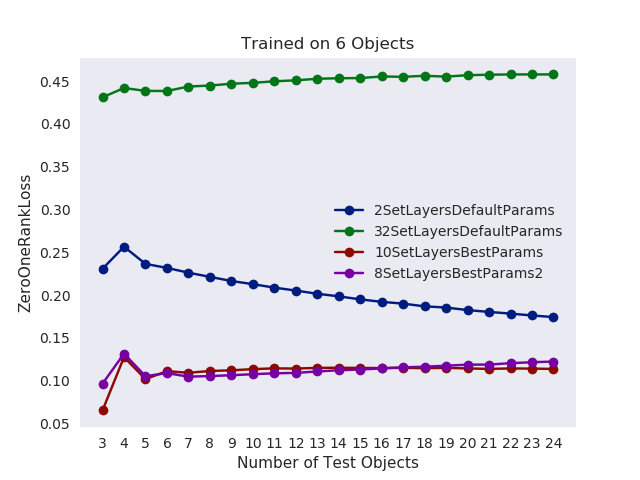

<IPython.core.display.Javascript object>


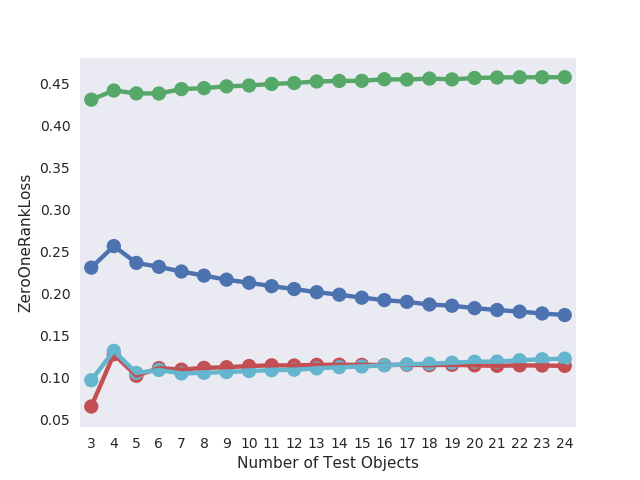

<IPython.core.display.Javascript object>


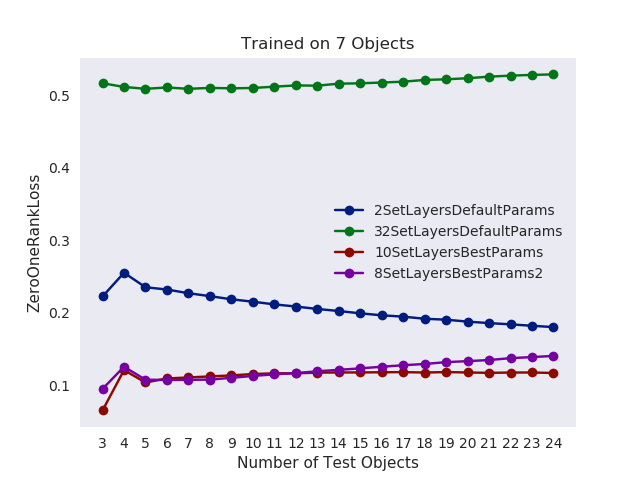

<IPython.core.display.Javascript object>


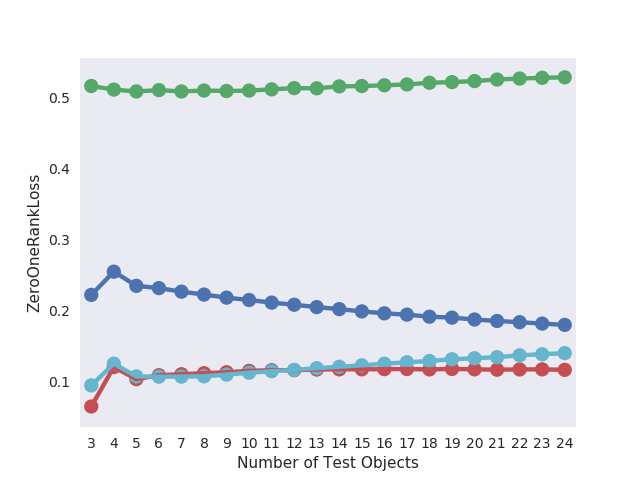

In [5]:
for i,df_path in enumerate(df_result_files):
    df = pd.read_csv(df_path)
    plot_path =os.path.join(os.getcwd(), SUB_FOLDER ,"generalizing_t_{}.pdf".format(i+5))
    title = "Trained on {} Objects".format(i+5)
    plot_df(df, plot_path=plot_path, plot_title=title)
    plot_df_pointplot(df, plot_path=plot_path.split(".pdf")[0]+"_ pointplot.pdf", plot_title=title)

# Code to parse the log file
log_path = os.path.join(os.getcwd(),SUB_FOLDER ,"generalizing_mean2.log")
data = np.array([line.rstrip('\n') for line in open(log_path)])
rows = []
for n_objects in np.arange(2, 25):
    one_row = [n_objects]
    for line in data:
        if("Experiment INFO" in line and "Out of sample error zero_one_rank_loss" in line):
            line = line.split("Experiment INFO     Out of sample error zero_one_rank_loss : ")[-1]
            if(" for n_objects {}".format(n_objects) in line):
                objects = int(line.split(" for n_objects ".format(n_objects))[1])
                if(objects==n_objects):
                    #print("Objects: {}".format(objects))
                    loss = float(line.split(" for n_objects ".format(n_objects))[0])
                    #print(loss)
                    one_row.append(loss)
    rows.append(one_row)
df = pd.DataFrame(rows, columns=cols)
df_path = os.path.join(os.getcwd(),SUB_FOLDER ,"generalizing_t_mean.csv")
df.to_csv(df_path, index=False)
df

# Code to plt the orignal Dataframe
df_path = os.path.join(os.getcwd(), SUB_FOLDER, "generalizing.csv")
df = pd.read_csv(df_path)
cols = list(df.columns.values)
cols = cols[-7:] + cols[:-7]
MODEL = "aModel"
for x in ['n_test_objects 2', 'Unnamed: 0', 'aModel']:
    cols.remove(x)
    cols.insert(0, x)
df = df[cols]
del df['Unnamed: 0']
df = df.set_index(MODEL).T
df

plt.gcf().clear()
fig = plt.figure()
for col in df.columns.values[1:]:
    df[col].plot(legend=True)
plt.show()

In [3]:
plt.style.use('default')
df_b = pd.read_csv(os.path.join(os.getcwd(), SUB_FOLDER, "generalizing_mean_borda_5.csv"))
df_G = pd.read_csv(os.path.join(os.getcwd(), SUB_FOLDER, "generalizing_mean_t_5.csv"))
x_vals = df_G[df_G.columns.values[0]]
acc_g = 1.0 - df_G["10SetLayersBestParams"]
acc_b = 1.0 - df_b["LayersBestParams"]

In [5]:
acc_b

0     0.801413
1     0.773525
2     0.781930
3     0.784455
4     0.788413
5     0.792279
6     0.796344
7     0.799881
8     0.803521
9     0.806973
10    0.810117
11    0.813816
12    0.817160
13    0.820077
14    0.822205
15    0.825192
16    0.826893
17    0.830032
18    0.832366
19    0.834369
20    0.836603
21    0.838419
Name: LayersBestParams, dtype: float64

<IPython.core.display.Javascript object>


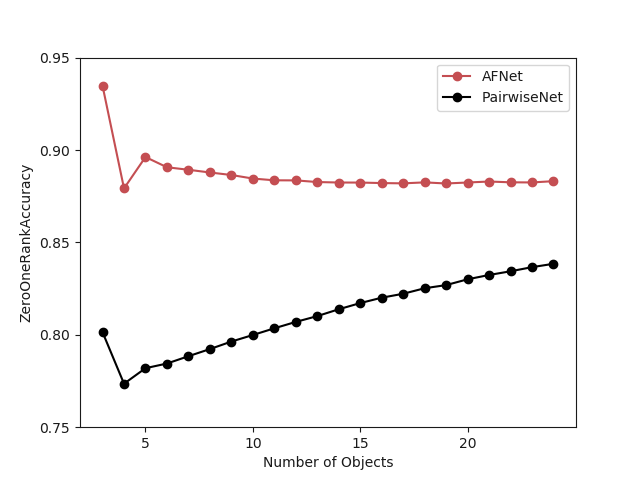

In [11]:
y_label="ZeroOneRankAccuracy"
x_label="Number of Objects"
fig, ax = plt.subplots()
plt.plot(x_vals, acc_g , marker="o",color="r", label="AFNet")
plt.plot(x_vals, acc_b , marker="o",color="black", label="PairwiseNet")
ax.xaxis.set_ticks(np.arange(3, 25))
ax.set_ylabel(y_label)
ax.set_xlabel(x_label)
plt.xticks(np.arange(5, 25, 5))
plt.yticks(np.arange(0.75,1.0,0.05))
plt.legend(loc="best")
plot_path =os.path.join(os.getcwd(), SUB_FOLDER ,"generalizing.png")
plt.savefig(plot_path, facecolor='w', edgecolor='w',transparent=False, dpi=800,format='png')
plt.show()

In [7]:
df["10SetLayersBestParams"]

0     0.065285
1     0.120779
2     0.103804
3     0.109337
4     0.110699
5     0.112166
6     0.113533
7     0.115446
8     0.116400
9     0.116445
10    0.117337
11    0.117598
12    0.117623
13    0.117890
14    0.118051
15    0.117521
16    0.118120
17    0.117588
18    0.117063
19    0.117481
20    0.117557
21    0.116867
Name: 10SetLayersBestParams, dtype: float64